<a href="https://colab.research.google.com/github/akutayaydin/Medical-Sarcopenia-Model/blob/main/Sarcopenia_Model_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# The Scope of this project is to find a way(s) to identify Sarcopenia patients?

In [1]:
# Import Libraries

import numpy as np
import pandas as pd

In [2]:
# Mount and Access Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# DATA COLLECTION #

In [315]:
df = pd.read_csv("/content/gdrive/My Drive/Google Colab Folder/Sarcopenia_Project/Sarco_Patients.csv")

In [316]:
#df

In [317]:
print('Shape: ' + str(df.shape))
print('Columns: ' + str(df.columns))

Shape: (5016, 43)
Columns: Index(['0', 'MMSE', 'Age', 'Weight ', 'Height ', 'Waist ', 'Hip', 'Smoking',
       ' Smoking (packet/year)', '  Alcohol', 'DM ', 'DM duration', 'İnsülin',
       'DM drug', 'Dyslipidemia', 'Dyslipidemia duration', 'Statin', 'KAH ',
       'KAH duration', 'Hipotiroidi', 'ASTIM', 'KOAH', 'OP', 'OTHERS', 'HT',
       'Type_HT', 'Dıration of HT', 'N_HT', 'HT drugs', 'Duration of 1HT',
       'Education', 'Job', 'Status', 'Egz', 'AT', 'CST', 'GS', 'GS.1', 'Star',
       'BMI', 'Sarcopenia', 'Gender', 'Ad'],
      dtype='object')


In [318]:
# DATA PREPROCESSING STARTS HERE

In [319]:
# Remove not relevant columns
df = df.drop('0', axis =1)
df = df.drop('Ad', axis =1)

# Rename turkish column names and spaces
df = df.rename(columns = {'İnsülin':'Insulin', 'Dyslipidemia duration': 'Dyslipidemia_Duration','DM duration': 'DM_Duration','DM drug': 'DM_Drug','KAH duration': 'KAH_Duration','Dıration of HT': 'HT_Duration', 'HT drugs': 'HT_Drugs','Duration of 1HT':'1HT_Duration','GS.1': 'GS_1','Weight ':'Weight','Height ':'Height','Waist ':'Waist', ' Smoking (packet/year)': 'Smoking_Packets_Per_Year',' Alcohol':'Alcohol','DM ': 'DM','KAH ':'KAH','  Alcohol':'Alcohol'})

In [320]:
# HANDLE MISSING VALUES

columns_to_check = [
    'MMSE', 'Age', 'Weight', 'Height', 'Waist', 'Hip', 'Smoking', 'Smoking_Packets_Per_Year',
    'DM', 'DM_Duration', 'Insulin', 'Dyslipidemia', 'Dyslipidemia_Duration', 'KAH',
    'KAH_Duration', 'Hipotiroidi', 'ASTIM', 'KOAH', 'HT', 'HT_Duration', 'N_HT',
    '1HT_Duration', 'AT', 'CST', 'GS', 'GS_1', 'Star', 'BMI'
]

# Convert the values in the specified column to numeric data types
for col in columns_to_check:
    non_numeric = pd.to_numeric(df[col], errors='coerce').notna().any()
    print(f"Column '{col}' contains non-numeric values: {non_numeric}")

df['OP'] = df['OP'].replace(' ',np.nan)

Column 'MMSE' contains non-numeric values: True
Column 'Age' contains non-numeric values: True
Column 'Weight' contains non-numeric values: True
Column 'Height' contains non-numeric values: True
Column 'Waist' contains non-numeric values: True
Column 'Hip' contains non-numeric values: True
Column 'Smoking' contains non-numeric values: True
Column 'Smoking_Packets_Per_Year' contains non-numeric values: True
Column 'DM' contains non-numeric values: True
Column 'DM_Duration' contains non-numeric values: True
Column 'Insulin' contains non-numeric values: True
Column 'Dyslipidemia' contains non-numeric values: True
Column 'Dyslipidemia_Duration' contains non-numeric values: True
Column 'KAH' contains non-numeric values: True
Column 'KAH_Duration' contains non-numeric values: True
Column 'Hipotiroidi' contains non-numeric values: True
Column 'ASTIM' contains non-numeric values: True
Column 'KOAH' contains non-numeric values: True
Column 'HT' contains non-numeric values: True
Column 'HT_Durat

In [321]:
#df.to_excel('/content/gdrive/My Drive/Google Colab Folder/Sarcopenia_Project/Sarco_output.xlsx', index=False)

In [322]:
print('Shape: ' + str(df.shape))
print('Columns: ' + str(df.columns))

Shape: (5016, 41)
Columns: Index(['MMSE', 'Age', 'Weight', 'Height', 'Waist', 'Hip', 'Smoking',
       'Smoking_Packets_Per_Year', 'Alcohol', 'DM', 'DM_Duration', 'Insulin',
       'DM_Drug', 'Dyslipidemia', 'Dyslipidemia_Duration', 'Statin', 'KAH',
       'KAH_Duration', 'Hipotiroidi', 'ASTIM', 'KOAH', 'OP', 'OTHERS', 'HT',
       'Type_HT', 'HT_Duration', 'N_HT', 'HT_Drugs', '1HT_Duration',
       'Education', 'Job', 'Status', 'Egz', 'AT', 'CST', 'GS', 'GS_1', 'Star',
       'BMI', 'Sarcopenia', 'Gender'],
      dtype='object')


In [323]:
# LOOK FOR OUTLIERS
df.describe().T

# Normalization will be completed as part of pipeline StandardScaler

,count,mean,std,min,25%,50%,75%,max
MMSE,4115.0,27.620656,2.859489,9.00,27.00,28.00,30.00,30.00
Age,5015.0,61.996810,9.696511,42.00,54.00,62.00,69.00,95.00
Weight,5007.0,76.580188,13.711160,34.00,67.00,76.00,85.00,137.00
Height,5007.0,160.495906,9.034135,125.00,155.00,160.00,166.00,260.00
Waist,4903.0,98.171936,19.209012,0.00,90.00,98.00,106.00,915.00
Hip,4905.0,111.008155,14.486069,0.00,102.00,109.00,117.00,191.00
Smoking,5016.0,0.320375,0.466667,0.00,0.00,0.00,1.00,1.00
Smoking_Packets_Per_Year,5014.0,8.190666,16.073376,0.00,0.00,0.00,10.00,150.00
DM,5014.0,0.304547,0.460261,0.00,0.00,0.00,1.00,1.00
DM_Duration,4929.0,3.123554,6.536226,0.00,0.00,0.00,2.00,40.00


In [324]:
# HANDLE MISCALCULATED BMI #v1

In [325]:
'''
df ['Height_Meter_Square'] = (df ['Height'] / 100) ** 2
df ['Height_Meter_Square'] = df ['Height_Meter_Square'].round(2)
df ['BMI'] = df ['Weight'] / df ['Height_Meter_Square']

df = df.drop(columns = 'Height_Meter_Square')

df = df.round(2)
'''

"\ndf ['Height_Meter_Square'] = (df ['Height'] / 100) ** 2\ndf ['Height_Meter_Square'] = df ['Height_Meter_Square'].round(2)\ndf ['BMI'] = df ['Weight'] / df ['Height_Meter_Square']\n\ndf = df.drop(columns = 'Height_Meter_Square')\n\ndf = df.round(2)\n"

In [326]:
# HANDLE MISCALCULATED BMI #V2
# Instead of recalculating BMI. I removed BMI values with high differences.

In [327]:
df ['Height_Meter_Square'] = (df ['Height'] / 100) ** 2
df ['Height_Meter_Square'] = df ['Height_Meter_Square'].round(2)
df ['BMI_Calc'] = df ['Weight'] / df ['Height_Meter_Square']

df = df.drop(columns = 'Height_Meter_Square')
df = df.round(2)

df ['BMI_Diff'] = df ['BMI'] - df ['BMI_Calc']
df ['BMI_Diff'] = df ['BMI_Diff'].abs()

df = df [df ['BMI_Diff'] < 0.5]

In [328]:
df.shape #5016 (Initial # of Data) >>4916

(4916, 43)

In [329]:
# CREATE A NEW FEATURE: BMI_CAT will be created to improve model's performance

In [330]:
df['BMI_Cat'] = ''

In [331]:
df.loc [df['BMI'] < 18.5, 'BMI_Cat'] = 'Underweight'
df.loc[(df['BMI']>= 18.5) & (df['BMI']<= 24.99),'BMI_Cat'] = 'Normalweight'
df.loc[(df['BMI']>= 25) & (df['BMI']<= 29.99),'BMI_Cat'] = 'Overweight'
df.loc[(df['BMI']>= 30) & (df['BMI']<= 39.99),'BMI_Cat'] = 'Obesity'
df.loc[df['BMI']>= 40,'BMI_Cat' ] = 'MorbidObesity'

In [335]:
# What % is sarcopenia
df.groupby('BMI_Cat')['Sarcopenia'].sum() / df.groupby('BMI_Cat')['Sarcopenia'].count()

BMI_Cat
MorbidObesity    0.427885
Normalweight     0.120603
Obesity          0.249364
Overweight       0.160668
Underweight      0.266667
Name: Sarcopenia, dtype: float64

In [248]:
''' THIS PART OF CODE WAS USED TO VALIDATE MISCALCULATION FOR BMI INDEX
# outline = df[df['BMI'] > 40][['BMI','Age','Weight','Height']]
outline = df[['BMI','Age','Weight','Height']]

outline= outline.dropna().reset_index(drop = True)

outline ['Height_Meter_Square'] = (outline ['Height'] / 100) ** 2
outline ['BMI_Calc'] = outline ['Weight'] / outline ['Height_Meter_Square']
outline ['BMI_Calc'] = outline ['BMI_Calc'].round(2)
outline ['BMI'] = outline ['BMI'].round(2)
outline ['BMI_Diff'] = outline ['BMI'] - outline ['BMI_Calc']
outline ['BMI_Diff'] = outline ['BMI_Diff'] .abs()
#temp = outline [outline ['BMI'] != outline ['BMI_Calc']]
temp = outline [outline ['BMI_Diff'] > 1]
temp.sort_values(by='BMI',ascending=False)

'''

" THIS PART OF CODE WAS USED TO VALIDATE MISCALCULATION FOR BMI INDEX\n# outline = df[df['BMI'] > 40][['BMI','Age','Weight','Height']]\noutline = df[['BMI','Age','Weight','Height']]\n\noutline= outline.dropna().reset_index(drop = True)\n\noutline ['Height_Meter_Square'] = (outline ['Height'] / 100) ** 2\noutline ['BMI_Calc'] = outline ['Weight'] / outline ['Height_Meter_Square']\noutline ['BMI_Calc'] = outline ['BMI_Calc'].round(2)\noutline ['BMI'] = outline ['BMI'].round(2)\noutline ['BMI_Diff'] = outline ['BMI'] - outline ['BMI_Calc']\noutline ['BMI_Diff'] = outline ['BMI_Diff'] .abs()\n#temp = outline [outline ['BMI'] != outline ['BMI_Calc']]\ntemp = outline [outline ['BMI_Diff'] > 1]\ntemp.sort_values(by='BMI',ascending=False)\n\n"

Patient age group is between 42-95. Average age is 62 years old.

In [275]:
categorical_values = df.select_dtypes(include=[object])
categorical_values.columns

Index(['Alcohol', 'DM_Drug', 'Statin', 'OP', 'OTHERS', 'Type_HT', 'HT_Drugs',
       'Education', 'Job', 'Status', 'Egz', 'Gender', 'BMI_Cat'],
      dtype='object')

In [276]:
# Label Encoding for Categorical Features
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

columns_to_encode = ['Alcohol', 'DM_Drug', 'Statin', 'OP', 'OTHERS', 'Type_HT', 'HT_Drugs',
       'Education', 'Job', 'Status', 'Egz', 'Gender','BMI_Cat']

for col in columns_to_encode:
  df[col + '_encoded'] = label_encoder.fit_transform(df[col])

In [214]:
# FEATURE ENGINEERING #


1.   **'MMSE'**, Mini-Mental State Examination, a test used to assess cognitive impairment and dementia
1.   **'Waist'**, waist circumference
1.   **'Hip'**, hip circumference
1.   **'DM'**, individual has diabetes or not
1.   **'DM_Duration'**, length of time the individual has had diabetes
1.   **'Insulin'**, Is individual taking insulin
1.   **'DM_Drug'**, medications or drugs used to manage diabetes
1.   **'Dyslipidemia'**, cholesterol levels
1.   **'Statin'**, statin medications to manage dyslipidemia
1.   **'KAH'**, coronary artery disease
1.   **'Hipotiroidi'**, underactive thyroid gland
1.   **'KOAH'**, Chronic Obstructive Pulmonary Disease (Kronik Obstrüktif Akciğer Hastalığı)
1.   **'OP'**, osteoporosis (Kemik Erimesi)
1.   **'HT'**, high blood pressure
1.   **'N_HT'**, number of medications or drugs taken for hypertension???
1.   **'1HT_Duration'**, duration of time since the first diagnosis of hypertension.???
1.   **'Status'**, Maritial Status
1.   **'Egz'**, exercise or physical activity indicator
1.   **'AT'**, ???
1.   **'CST'**, CHAIR STAND TEST??
1.   **'GS'**, Gait speed(walk test)
1.   **'GS_1'**, grip strength
1.   **'Star'**, sonographic thigh adjustment ratio
1.   **'BMI'**, Body Mass Index



In [279]:
# Correlation Matrix
# Look for correlation between numerical and encoded parameters

num_columns = [
    'MMSE', 'Age', 'Weight', 'Height', 'Waist', 'Hip', 'Smoking', 'Smoking_Packets_Per_Year',
    'DM', 'DM_Duration', 'Insulin', 'Dyslipidemia', 'Dyslipidemia_Duration', 'KAH',
    'KAH_Duration', 'Hipotiroidi', 'ASTIM', 'KOAH', 'HT', 'HT_Duration', 'N_HT',
    '1HT_Duration', 'AT', 'CST', 'GS', 'GS_1', 'Star', 'BMI',
    'Alcohol_encoded', 'DM_Drug_encoded', 'Statin_encoded', 'OP_encoded', 'OTHERS_encoded', 'Type_HT_encoded', 'HT_Drugs_encoded',
    'Education_encoded', 'Job_encoded', 'Status_encoded', 'Egz_encoded', 'Gender_encoded','BMI_Cat_encoded','Sarcopenia']

num_df = pd.DataFrame()

for col in num_columns:
  num_df[col] = df[col]

corr = num_df.corr()
corr

,MMSE,Age,Weight,Height,Waist,Hip,Smoking,Smoking_Packets_Per_Year,DM,DM_Duration,...,OTHERS_encoded,Type_HT_encoded,HT_Drugs_encoded,Education_encoded,Job_encoded,Status_encoded,Egz_encoded,Gender_encoded,BMI_Cat_encoded,Sarcopenia
MMSE,1.000000,-0.230984,0.052458,0.180171,-0.008078,-0.071179,0.165081,0.118643,-0.070848,-0.068875,...,-0.029287,0.036702,0.040488,-0.214904,-0.004296,0.119213,0.136216,0.136905,-0.016012,-0.068908
Age,-0.230984,1.000000,-0.106895,-0.200345,0.100635,0.036903,-0.049404,0.045358,0.155243,0.210446,...,-0.160562,-0.065831,-0.150219,0.072885,0.109049,0.024966,0.005874,0.096963,0.014881,0.335478
Weight,0.052458,-0.106895,1.000000,0.352689,0.468224,0.508111,0.074684,0.074366,0.132094,0.066239,...,-0.032673,-0.137123,-0.088753,-0.027114,0.048341,0.011218,-0.089292,0.244970,0.060648,0.129446
Height,0.180171,-0.200345,0.352689,1.000000,0.061637,-0.096231,0.268220,0.258287,-0.089623,-0.112329,...,-0.061580,0.028068,0.071271,-0.053608,0.112655,-0.050915,0.130718,0.660529,0.032209,-0.085459
Waist,-0.008078,0.100635,0.468224,0.061637,1.000000,0.233849,0.008179,0.033908,0.122302,0.089815,...,-0.034836,-0.132383,-0.091449,0.010696,0.020891,0.017493,-0.054862,0.109902,0.019192,0.134811
Hip,-0.071179,0.036903,0.508111,-0.096231,0.233849,1.000000,-0.074152,-0.074424,0.123176,0.110957,...,0.000320,-0.024508,-0.083004,-0.000455,-0.023035,0.038891,-0.123783,-0.154337,0.009427,0.131381
Smoking,0.165081,-0.049404,0.074684,0.268220,0.008179,-0.074152,1.000000,0.735076,0.009275,-0.015910,...,-0.090405,-0.060156,-0.006645,-0.118842,0.057957,-0.008187,0.084569,0.344866,0.007479,-0.023803
Smoking_Packets_Per_Year,0.118643,0.045358,0.074366,0.258287,0.033908,-0.074424,0.735076,1.000000,0.033792,0.005007,...,-0.076845,-0.070417,-0.019273,-0.113301,0.063232,-0.019083,0.060355,0.378898,-0.005362,0.012891
DM,-0.070848,0.155243,0.132094,-0.089623,0.122302,0.123176,0.009275,0.033792,1.000000,0.737096,...,0.005721,-0.168218,-0.171937,-0.009301,0.016577,0.010155,-0.075248,0.000626,0.013065,0.107134
DM_Duration,-0.068875,0.210446,0.066239,-0.112329,0.089815,0.110957,-0.015910,0.005007,0.737096,1.000000,...,0.021521,-0.114292,-0.146895,0.032115,0.006024,0.024755,-0.056533,-0.016062,0.002936,0.150241


In [216]:
#range(corr.shape[1])

<Figure size 960x720 with 0 Axes>

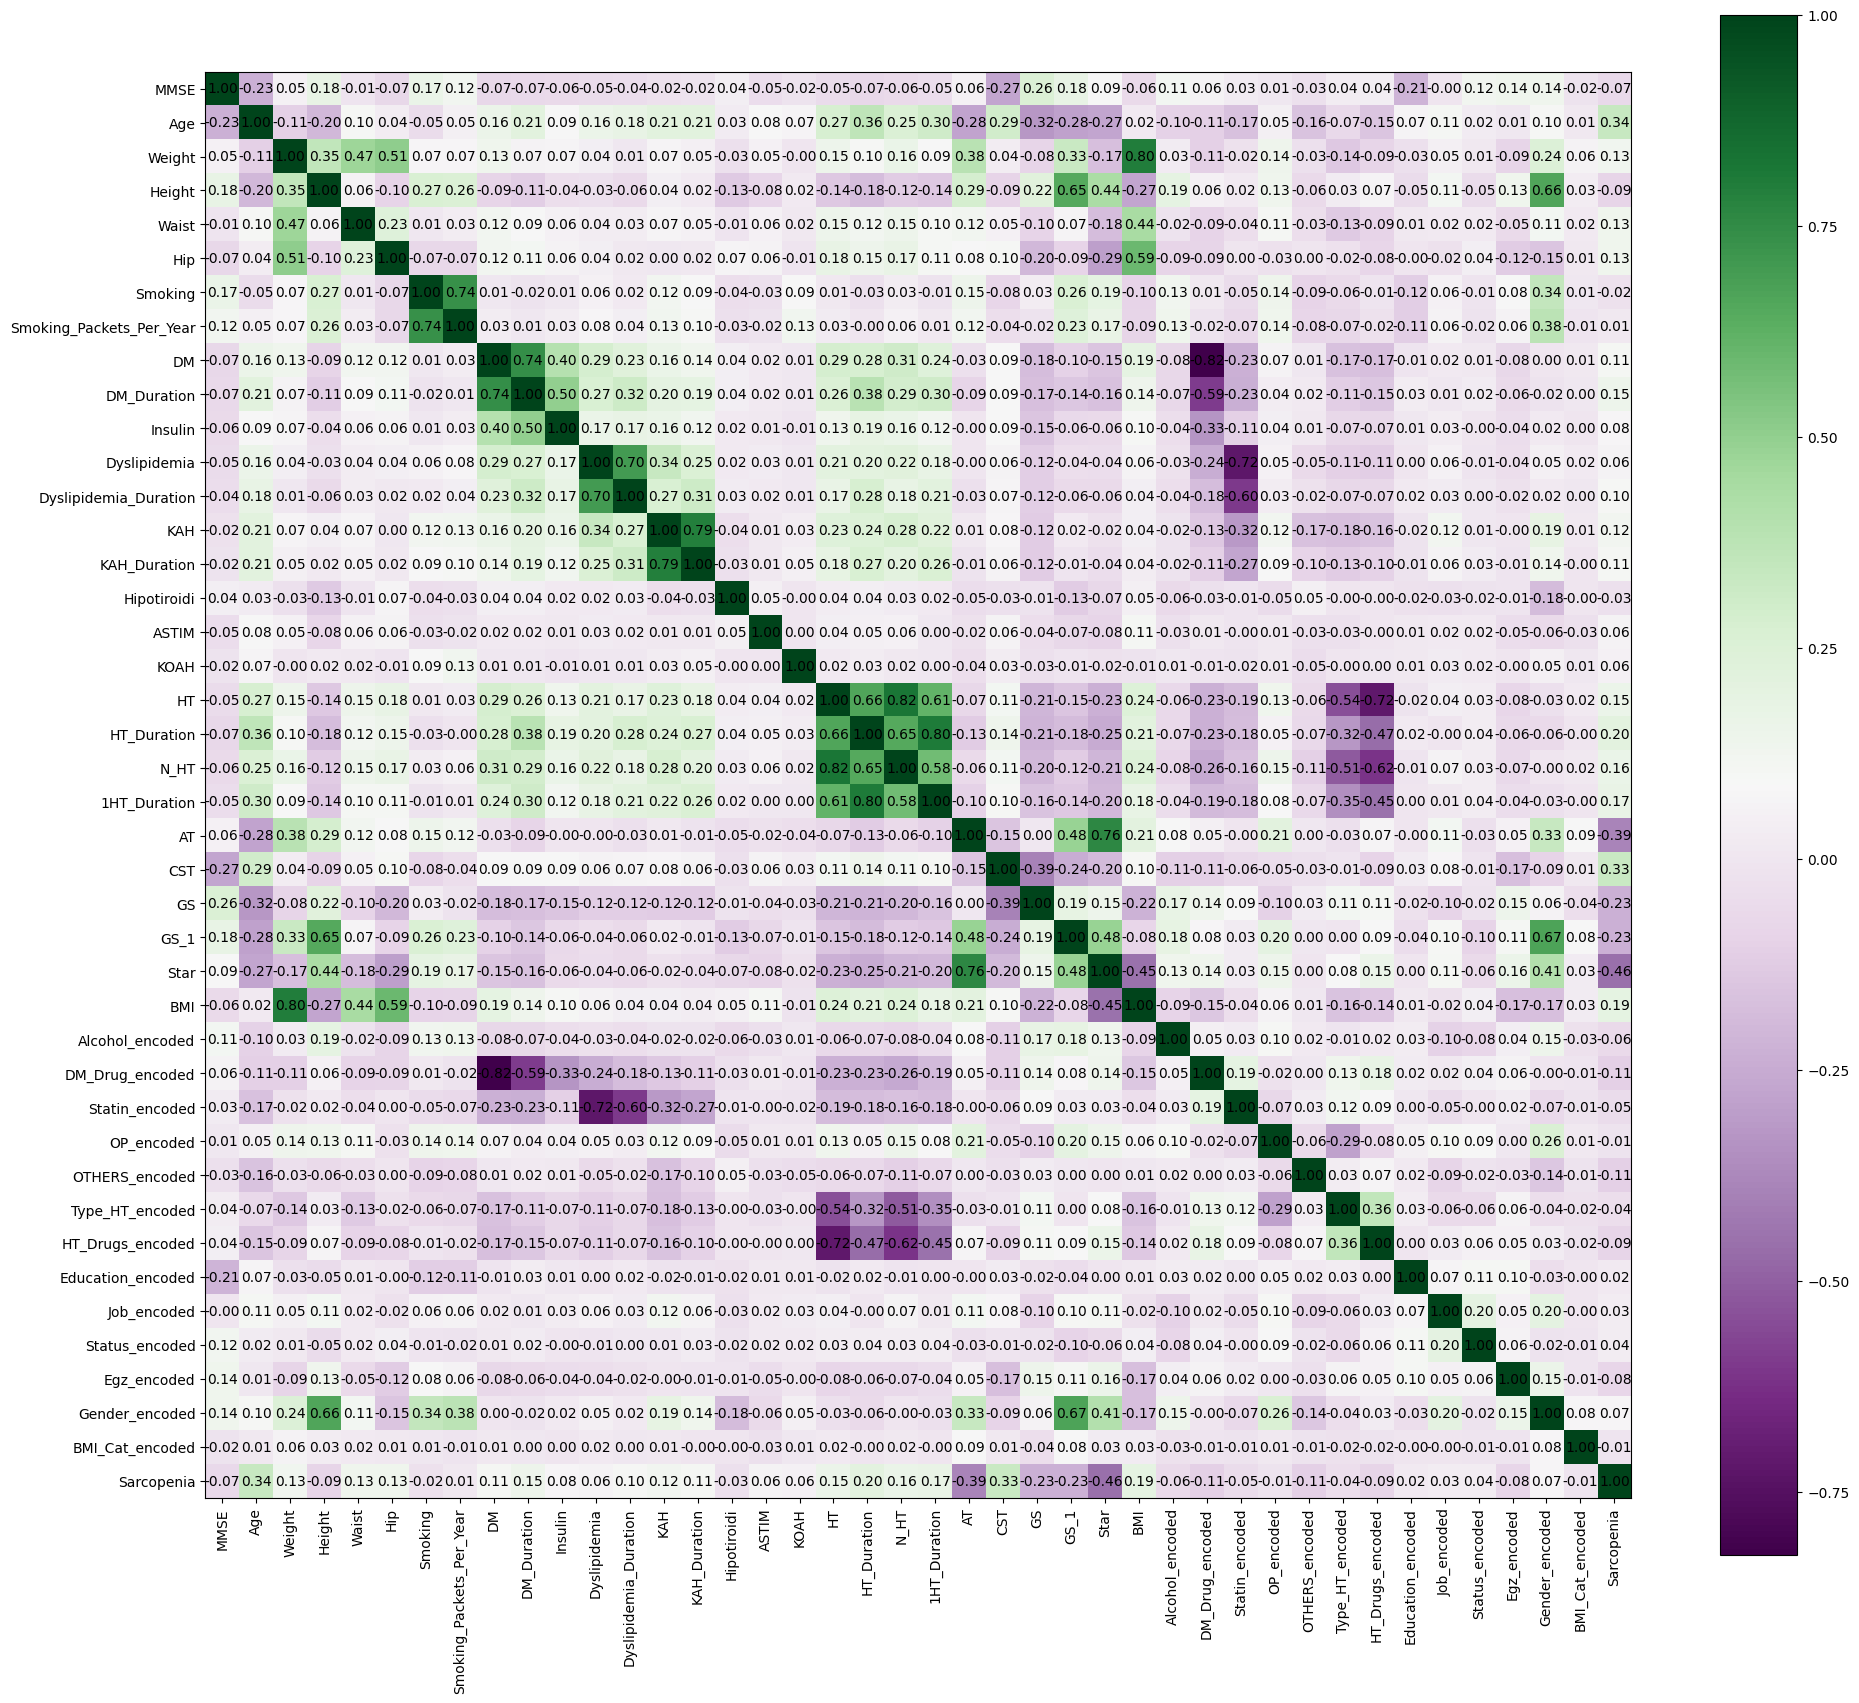

In [280]:
# Data Visualization
# Draw heatmap to see correlation
import matplotlib.pyplot as plt

plt.figure(dpi = 150)
plt.figure(figsize=(23,20))

plt.imshow(corr,cmap = 'PRGn')
cbar = plt.colorbar(spacing='uniform')

plt.xticks(range(len(corr)),labels =corr.columns,rotation = 90)
plt.yticks(range(len(corr)),labels = corr.columns)

# Add text annotations for correlation values
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        plt.text(i, j, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', color='black')

# Conclusion:
# Positive Correlation: Age, CST,
# Weak Positive Correlation: BMI, HT, HT_Duration, N_HT, 1HT_Duration
# Strong Negative Corr: Star, AT, GS_1, GS

plt.savefig('/content/gdrive/My Drive/Google Colab Folder/Sarcopenia_Project/corr_output.png', format = 'png', dpi = 300)

In [21]:
# What is the impact of age to Sarcopenia
import plotly.express as px

# Above 60 years old there is higher chance of becoming Sarcopenia.
# In the dataset for the ages between 40-60, 8% of the population is Sarcopenia
#                for the ages betweeb 60-80, 25% of the population is Sarcopenia
# There is a direct relationship between Age and Sarcopenia

fig = px.histogram(df, x='Age', color='Sarcopenia',
                   title='Distribution of Sarcopenia by Age',
                   labels={'Age': 'Age', 'count': 'Frequency', 'Sarcopenia': 'Sarcopenia'},
                   nbins=10,  # Number of bins for age groups
                   opacity=0.6  # Adjust opacity for better visualization
                   )

fig.update_layout(xaxis_title='Age', yaxis_title='Frequency', barmode='overlay')

fig.show()


In [ ]:

# What is the impact of MMSE to Sarcopenia
import plotly.express as px

# When MMSE score is lower there is a higher chance of becoming Sarcopenia.
# In the dataset if MMSE score is between 20-24 1/4 of the population is Sarcopenia
#                if MMSE score is between 25-30 1/5 of the population is Sarcopenia
# There is a negative correleration between MMSE and Sarcopenia

fig = px.histogram(df, x='MMSE', color='Sarcopenia',
                   title='Distribution of Sarcopenia by MMSE',
                   labels={'MMSE': 'MMSE', 'count': 'Frequency', 'Sarcopenia': 'Sarcopenia'},
                   nbins=5,  # Number of bins for age groups
                   opacity=0.6  # Adjust opacity for better visualization
                   )

fig.update_layout(xaxis_title='MMSE', yaxis_title='Frequency', barmode='overlay')

fig.show()

In [122]:
# What is the impact of BMI to Sarcopenia
import plotly.express as px

# When BMI score is higher there is a higher chance of becoming Sarcopenia.
# In the dataset if BMI is between 30-39.9 1/4 of the population is Sarcopenia
#                if BMI is between 40-49.9 almost 1/2 of the population is Sarcopenia
# There is a positive correleration between BMI and Sarcopenia

fig = px.histogram(df, x='BMI', color='Sarcopenia',
                   title='Distribution of Sarcopenia by BMI',
                   labels={'BMI': 'BMI', 'count': 'Frequency', 'Sarcopenia': 'Sarcopenia'},
                   nbins=5,  # Number of bins for age groups
                   opacity=0.6
                   )

fig.update_layout(xaxis_title='BMI', yaxis_title='Frequency', barmode='overlay')

fig.show()

In [ ]:
# What is the impact of OP to Sarcopenia
import plotly.express as px

# OP = 0 or OP = 1 the impact is somewhat same. Not a good determinator.
fig = px.histogram(df, x='OP', color='Sarcopenia',
                   title='Distribution of Sarcopenia by OP',
                   labels={'OP': 'OP', 'count': 'Frequency', 'Sarcopenia': 'Sarcopenia'},
                   nbins=2,  # Number of bins for groups
                   opacity=0.6
                   )

fig.update_layout(xaxis_title='OP', yaxis_title='Frequency', barmode='overlay')

fig.show()

In [ ]:
# What is the impact of HT to Sarcopenia
import plotly.express as px

# If the patience has HT there is higher chance of becoming Sarcopenia
fig = px.histogram(df, x='HT', color='Sarcopenia',
                   title='Distribution of Sarcopenia by HT',
                   labels={'HT': 'HT', 'count': 'Frequency', 'Sarcopenia': 'Sarcopenia'},
                   nbins=2,  # Number of bins for groups
                   opacity=0.6
                   )

fig.update_layout(xaxis_title='HT', yaxis_title='Frequency', barmode='overlay')

fig.show()

In [22]:
df['Egz'] = df['Egz'].replace(' 1-2/week','1-2/week')

In [23]:
# What is the impact of Egz to Sarcopenia
import plotly.express as px

# If you dont do exercise you have higher chance for Sarcopenia
# Used this feature but the results got worse

fig = px.histogram(df, x='Egz', color='Sarcopenia',
                   title='Distribution of Sarcopenia by Egz',
                   labels={'Egz': 'Egz', 'count': 'Frequency', 'Sarcopenia': 'Sarcopenia'},
                   nbins=5,  # Number of bins for groups
                   opacity=0.6
                   )

fig.update_layout(xaxis_title='Egz', yaxis_title='Frequency', barmode='overlay')

fig.show()

In [24]:
# What is the impact of Star to Sarcopenia
import plotly.express as px

# If star is less than 1 you have higher chance of Sarcopenia

fig = px.histogram(df, x='Star', color='Sarcopenia',
                   title='Distribution of Sarcopenia by Star',
                   labels={'Star': 'Star', 'count': 'Frequency', 'Sarcopenia': 'Sarcopenia'},
                   nbins=10,  # Number of bins for groups
                   opacity=0.6
                   )

fig.update_layout(xaxis_title='Star', yaxis_title='Frequency', barmode='overlay')

fig.show()

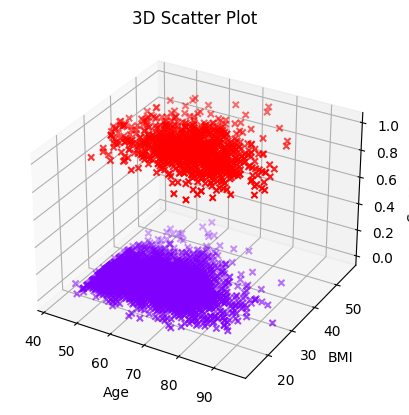

In [218]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = df['Sarcopenia']


ax.scatter(df['Age'], df['BMI'], df['Sarcopenia'], c=colors, marker='x', cmap='rainbow')

ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('Sarcopenia')

plt.title('3D Scatter Plot')

plt.show()


In [25]:
# DATA SET PREPRATION / PREPROCESSING #

In [281]:
# Drop null data points
filter_columns = [
    'MMSE', 'Age', 'Weight', 'Height', 'Waist', 'Hip', 'Smoking', 'Smoking_Packets_Per_Year',
    'DM', 'DM_Duration', 'Insulin', 'Dyslipidemia', 'Dyslipidemia_Duration', 'KAH',
    'KAH_Duration', 'Hipotiroidi', 'ASTIM', 'KOAH', 'HT', 'HT_Duration', 'N_HT',
    '1HT_Duration', 'AT', 'CST', 'GS', 'GS_1', 'Star', 'BMI',
    'Alcohol', 'DM_Drug', 'Statin', 'OP', 'OTHERS', 'Type_HT', 'HT_Drugs',
    'Education', 'Job', 'Status', 'Egz', 'Gender','BMI_Cat','Sarcopenia']


cleaned_df = pd.DataFrame()

for col in filter_columns:
  cleaned_df[col] = df[col].dropna().reset_index(drop=True)

In [282]:
cleaned_df = cleaned_df[[
    'MMSE', 'Age', 'Weight', 'Height', 'Waist', 'Hip', 'Smoking', 'Smoking_Packets_Per_Year',
    'DM', 'DM_Duration', 'Insulin', 'Dyslipidemia', 'Dyslipidemia_Duration', 'KAH',
    'KAH_Duration', 'Hipotiroidi', 'ASTIM', 'KOAH', 'HT', 'HT_Duration', 'N_HT',
    '1HT_Duration', 'AT', 'CST', 'GS', 'GS_1', 'Star', 'BMI',
    'Alcohol', 'DM_Drug', 'Statin', 'OP', 'OTHERS', 'Type_HT', 'HT_Drugs',
    'Education', 'Job', 'Status', 'Egz', 'Gender','BMI_Cat','Sarcopenia']]

In [283]:
cleaned_df

,MMSE,Age,Weight,Height,Waist,Hip,Smoking,Smoking_Packets_Per_Year,DM,DM_Duration,...,OTHERS,Type_HT,HT_Drugs,Education,Job,Status,Egz,Gender,BMI_Cat,Sarcopenia
0,29.0,74.0,88.0,178.0,113.0,113.0,1,10.0,1.0,10.0,...,BPH,B BLOCKER,metoprolol,University,judge,Retired,3-4/week,M,Overweight,0
1,30.0,62.0,105.0,172.0,125.0,110.0,1,30.0,0.0,0.0,...,"BPH, gastrit",ARB+B BLOCKER+DIURETIC,Candesartane/Hidroklotiazid/Metoprolol,Secondary School,chauffeur,Retired,0,M,Obesity,1
2,28.0,65.0,89.0,169.0,110.0,114.0,0,0.0,0.0,0.0,...,aritmi,ARB+DIURETIC,candesartan/Hydrochlorothiazide,University,Soldier,Retired,3-4/week,M,Obesity,0
3,29.0,71.0,68.0,160.0,103.0,100.0,1,5.0,0.0,0.0,...,"RA, migren",ACE,Perindopri,University,Bank clerk,Retired,1-2/week,F,Overweight,0
4,27.0,61.0,80.0,160.0,102.0,105.0,0,0.0,0.0,0.0,...,BPH,ARB+DIURETIC,telmisartan+hidroklorotiyazid,University,Teacher,Retired,1-2/week,F,Obesity,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4015,30.0,57.0,71.0,159.0,107.0,112.0,1,0.0,1.0,17.0,...,NaN,NaN,NaN,High School,emekli veya çalışmıyor,evhanımı,0,F,Overweight,0
4016,29.0,52.0,72.0,150.0,103.0,100.0,0,0.0,0.0,6.0,...,NaN,NaN,NaN,High School,emekli veya çalışmıyor,evhanımı,0,F,Obesity,0
4017,30.0,69.0,72.0,144.0,90.0,108.0,0,3.0,1.0,0.0,...,NaN,NaN,NaN,High School,emekli veya çalışmıyor,evhanımı,0,F,Obesity,0
4018,30.0,76.0,65.0,151.0,105.0,104.0,0,0.0,0.0,0.0,...,NaN,NaN,NaN,University,emekli veya çalışmıyor,evhanımı,1-2/week,F,Overweight,1


In [ ]:
# Look for Clustering # NOT Completed !!!

In [34]:
from sklearn.cluster import KMeans

In [285]:
'''
inertia_values = []
K_range = range(1, 14)

num_df = num_df.dropna().reset_index(drop=True)

for k in K_range:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(num_df)
  inertia_values.append(kmeans.inertia_)

# Plot the inertia values against K values
plt.plot(K_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

kmeans = KMeans(n_clusters=chosen_k)

# Fit the model to your data
kmeans.fit(df)

cluster_assignments = kmeans.labels_

plt.scatter(df['feature1'], df['feature2'], c=cluster_assignments, cmap='rainbow')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()
'''

"\ninertia_values = []\nK_range = range(1, 14)\n\nnum_df = num_df.dropna().reset_index(drop=True)\n\nfor k in K_range:\n  kmeans = KMeans(n_clusters=k)\n  kmeans.fit(num_df)\n  inertia_values.append(kmeans.inertia_)\n\n# Plot the inertia values against K values\nplt.plot(K_range, inertia_values, marker='o')\nplt.xlabel('Number of Clusters (K)')\nplt.ylabel('Inertia')\nplt.title('Elbow Method for Optimal K')\nplt.show()\n\nkmeans = KMeans(n_clusters=chosen_k)\n\n# Fit the model to your data\nkmeans.fit(df)\n\ncluster_assignments = kmeans.labels_\n\nplt.scatter(df['feature1'], df['feature2'], c=cluster_assignments, cmap='rainbow')\nplt.xlabel('Feature 1')\nplt.ylabel('Feature 2')\nplt.title('K-Means Clustering')\nplt.show()\n"

In [29]:
# MODEL SELECTION #

In [286]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics

In [306]:
steps_num = [('imputer', SimpleImputer( strategy = 'mean')),
             ('scaler', StandardScaler())] # Use the Scaler to normalize data

steps_cat = [('imputer', SimpleImputer(strategy ='most_frequent')),
             ('oneHot', OneHotEncoder(handle_unknown='ignore'))]

numeric_transformator = Pipeline(steps = steps_num)

numeric_features = ['MMSE', 'Age', 'Weight', 'Height', 'Waist', 'Hip', 'Smoking', 'Smoking_Packets_Per_Year',
    'DM', 'DM_Duration', 'Insulin', 'Dyslipidemia', 'Dyslipidemia_Duration', 'KAH',
    'KAH_Duration', 'Hipotiroidi', 'ASTIM', 'KOAH', 'HT', 'HT_Duration', 'N_HT',
    '1HT_Duration', 'AT', 'CST', 'GS', 'GS_1', 'Star', 'BMI']

categoric_transformer = Pipeline(steps = steps_cat)

categoric_features =['Alcohol', 'DM_Drug', 'Statin', 'OP', 'OTHERS', 'Type_HT', 'HT_Drugs',
    'Education', 'Job', 'Status', 'Egz', 'Gender','BMI_Cat']


# Positive Correlation: Age, CST,
# Weak Positive Correlation: MMSE, BMI, HT, HT_Duration, N_HT, 1HT_Duration
# Strong Negative Corr: Star, AT, GS_1, GS

In [307]:
preprocessor = ColumnTransformer(transformers = [('num', numeric_transformator, numeric_features ),
                                                 ('cat', categoric_transformer, categoric_features)])


# **Test the data with the Logistic Regression Model**

In [308]:
log_model = Pipeline(steps = [('preprocessor', preprocessor),
                        ('regression', LogisticRegression())]
               )

In [309]:
y = cleaned_df['Sarcopenia']
X = cleaned_df.drop('Sarcopenia', axis =1)


In [310]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

In [311]:
log_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MMSE', 'Age', 'Weight',
                                                   'Height', 'Waist', 'Hip',
                                                   'Smoking',
                                                   'Smoking_Packets_Per_Year',
                                                   'DM', 'DM_Duration',
                                                   'Insulin', 'Dyslipidemia',
                                                   'Dyslipidemia_Duration',
                                                   'KAH', 'KAH_Duration',
                                                   'Hipotiroidi', 'ASTIM',
                                                   'KOAH', 'HT'...on',
                                                   'N_HT', '1HT_Duration', 'AT',
                                                   'CST', 'GS', 'GS_1', 'Star',
                                                   'BMI']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneHot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Alcohol', 'DM_Drug',
                                                   'Statin', 'OP', 'OTHERS',
                                                   'Type_HT', 'HT_Drugs',
                                                   'Education', 'Job', 'Status',
                                                   'Egz', 'Gender',
                                                   'BMI_Cat'])])),
                ('regression', LogisticRegression())])

In [312]:
y_pred = log_model.predict(X_test)

In [313]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,f1_score, recall_score, classification_report

In [314]:
# Evaluate Model's Performance
accuracy = accuracy_score(y_test,y_pred)
precision =precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)


confusion = confusion_matrix(y_test,y_pred)
print(f'Accuracy Score: {accuracy:.2f} - Overall correctness of the model. Accuracy = (TP + TN) / (TP + TN + FP + FN)\n')
print(f'Precision Score: {precision:.2f} - Measures accuracy of positive predictions of the model. Precision = TP / (TP + FP).\nFocuses on minimizing false positives, important when false alarms are costly (e.g spam email detection) \n')
print(f'Recall Score: {recall:.2f} - Sensivity or True Positive Rate. Measures how well model captures all positive instances. Recall = TP/ (TP + FN). \nFocuses on capturing as many true positives as possible, important when missing positives is costly(e.g medical diagnosis)\n')
print(f'F1 Score: {f1:.2f} - Hormonic mean of precision and recall. F1 Score = 2 * (Precision * Recall) / (Precision + Recall)\n')

print(f'Confusin Matrix Score TN: {confusion[0][0]}')
print(f'Confusin Matrix Score TP: {confusion[1][1]}')
print(f'Confusin Matrix Score FP: {confusion[0][1]}')
print(f'Confusin Matrix Score FN: {confusion[1][0]}')

Accuracy Score: 0.83 - Overall correctness of the model. Accuracy = (TP + TN) / (TP + TN + FP + FN)

Precision Score: 0.62 - Measures accuracy of positive predictions of the model. Precision = TP / (TP + FP).
Focuses on minimizing false positives, important when false alarms are costly (e.g spam email detection) 

Recall Score: 0.35 - Sensivity or True Positive Rate. Measures how well model captures all positive instances. Recall = TP/ (TP + FN). 
Focuses on capturing as many true positives as possible, important when missing positives is costly(e.g medical diagnosis)

F1 Score: 0.45 - Hormonic mean of precision and recall. F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

Confusin Matrix Score TN: 612
Confusin Matrix Score TP: 56
Confusin Matrix Score FP: 34
Confusin Matrix Score FN: 102


In [305]:
classification_rep = classification_report(y_test,y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       646
           1       0.63      0.35      0.45       158

    accuracy                           0.83       804
   macro avg       0.74      0.65      0.68       804
weighted avg       0.81      0.83      0.81       804



##  Test the data with XGBOOST Model

XGboost combines the prediction of multiple decision trees.

*   It has better predictive accuracy compare to decision tree
*   It reduces the risk of overfitting and bias that can occur with a single decision tree. It uses regularization techniques.
*   It sequentially adds trees to the model with each tree correcting errors of previous ones.
*   It was designed to be used with large and complicated data sets. It can handle both small and large data sets.





In [236]:
import xgboost as xgb

In [237]:
xgb_model = Pipeline(steps=[('preprocessor',preprocessor),('xgb',xgb.XGBClassifier())])

In [238]:
xgb_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MMSE', 'Age', 'Weight',
                                                   'Height', 'Waist', 'Hip',
                                                   'Smoking',
                                                   'Smoking_Packets_Per_Year',
                                                   'DM', 'DM_Duration',
                                                   'Insulin', 'Dyslipidemia',
                                                   'Dyslipidemia_Duration',
                                                   'KAH', 'KAH_Duration',
                                                   'Hipotiroidi', 'ASTIM',
                                                   'KOAH', 'HT'...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [239]:
y_pred = xgb_model.predict(X_test)

In [240]:
# Evaluate Model's Performance
accuracy = accuracy_score(y_test,y_pred)
precision =precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)


confusion = confusion_matrix(y_test,y_pred)
print(f'Accuracy Score: {accuracy:.2f} - Overall correctness of the model. Accuracy = (TP + TN) / (TP + TN + FP + FN)\n')
print(f'Precision Score: {precision:.2f} - Measures accuracy of positive predictions of the model. Precision = TP / (TP + FP).\nFocuses on minimizing false positives, important when false alarms are costly (e.g spam email detection) \n')
print(f'Recall Score: {recall:.2f} - Sensivity or True Positive Rate. Measures how well model captures all positive instances. Recall = TP/ (TP + FN). \nFocuses on capturing as many true positives as possible, important when missing positives is costly(e.g medical diagnosis)\n')
print(f'F1 Score: {f1:.2f} - Hormonic mean of precision and recall. F1 Score = 2 * (Precision * Recall) / (Precision + Recall)\n')


print(f'Confusin Matrix Score TN: {confusion[0][0]}')
print(f'Confusin Matrix Score TP: {confusion[1][1]}')
print(f'Confusin Matrix Score FP: {confusion[0][1]}')
print(f'Confusin Matrix Score FN: {confusion[1][0]}')

Accuracy Score: 0.84 - Overall correctness of the model. Accuracy = (TP + TN) / (TP + TN + FP + FN)

Precision Score: 0.61 - Measures accuracy of positive predictions of the model. Precision = TP / (TP + FP).
Focuses on minimizing false positives, important when false alarms are costly (e.g spam email detection) 

Recall Score: 0.51 - Sensivity or True Positive Rate. Measures how well model captures all positive instances. Recall = TP/ (TP + FN). 
Focuses on capturing as many true positives as possible, important when missing positives is costly(e.g medical diagnosis)

F1 Score: 0.56 - Hormonic mean of precision and recall. F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

Confusin Matrix Score TN: 595
Confusin Matrix Score TP: 81
Confusin Matrix Score FP: 51
Confusin Matrix Score FN: 77


In [241]:
classification_rep = classification_report(y_test,y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       646
           1       0.61      0.51      0.56       158

    accuracy                           0.84       804
   macro avg       0.75      0.72      0.73       804
weighted avg       0.83      0.84      0.84       804



In [242]:
# Access the feature importances
importances = xgb_model.named_steps['xgb'].feature_importances_

# Map importances to feature names for better understanding
feature_names = cleaned_df.columns
feature_importance_dict = dict(zip(feature_names, importances))

In [243]:
sorted_feature_importance_dict = dict(sorted(feature_importance_dict.items(), key = lambda x: x[1],reverse = True))

In [244]:
#print(f'{sorted_feature_importance_dict:.4f}')

for key, value in sorted_feature_importance_dict.items():
  print(f'{key}: {value:.4f}')

CST: 0.0393
Age: 0.0351
Hipotiroidi: 0.0195
BMI: 0.0182
GS_1: 0.0180
KAH: 0.0145
HT: 0.0129
Weight: 0.0125
DM: 0.0125
Hip: 0.0125
Smoking: 0.0119
Smoking_Packets_Per_Year: 0.0115
AT: 0.0113
Waist: 0.0111
GS: 0.0108
Dyslipidemia: 0.0107
KAH_Duration: 0.0104
Height: 0.0101
Dyslipidemia_Duration: 0.0100
Star: 0.0100
DM_Duration: 0.0097
HT_Duration: 0.0093
1HT_Duration: 0.0091
MMSE: 0.0086
N_HT: 0.0084
Alcohol: 0.0075
Statin: 0.0066
KOAH: 0.0038
ASTIM: 0.0022
Insulin: 0.0000
DM_Drug: 0.0000
OP: 0.0000
OTHERS: 0.0000
Type_HT: 0.0000
HT_Drugs: 0.0000
Education: 0.0000
Job: 0.0000
Status: 0.0000
Egz: 0.0000
Gender: 0.0000
Sarcopenia: 0.0000


In [245]:
# Create a Inclusion Table (feature, recall score and Confusion Matrix values)

In [246]:
import xgboost as xgb

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,f1_score, recall_score, classification_report

In [247]:
from itertools import combinations

import warnings

# Temporarily suppress all warnings
warnings.filterwarnings('ignore')

# Define your list of features
features = ['CST', 'GS', 'GS_1', 'Star', 'BMI','MMSE', 'Age', 'AT', 'HT']

inclusion_df = pd.DataFrame()
inclusion_df['Feature'] = ''
inclusion_df['Recall'] = ''
inclusion_df['TN'] = ''
inclusion_df['TP'] = ''
inclusion_df['FP'] = ''
inclusion_df['FN'] = ''

y = cleaned_df['Sarcopenia']
X = cleaned_df.drop('Sarcopenia', axis =1)

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

# Generate combinations of features
all_feature_combinations = []
for r in range(2, len(features) + 1):
    feature_combinations = list(combinations(features, r))
    #print(feature_combinations)
    all_feature_combinations.extend(feature_combinations)

for i in all_feature_combinations:
  X_train_subset = X_train.loc[:, i]
  X_test_subset = X_test.loc[:, i]

  boost_model = xgb.XGBClassifier()

  boost_model.fit(X_train_subset,y_train)

  y_pred = boost_model.predict(X_test_subset)

  #accuracy = accuracy_score(y_test,y_pred)
  #precision =precision_score(y_test,y_pred)
  #f1 = f1_score(y_test,y_pred)
  recall = recall_score(y_test,y_pred)

  confusion = confusion_matrix(y_test,y_pred)

  new_row = {'Feature': i, 'Recall': recall, 'TN':confusion[0][0] , 'TP':confusion[1][1] , 'FP':confusion[0][1] , 'FN':confusion[1][0]}
  inclusion_df = inclusion_df.append(new_row, ignore_index = True)

count = 0
for combination in all_feature_combinations:
  count= count + 1
count

502

In [249]:
inclusion_df = inclusion_df.sort_values(by = 'Recall', ascending=False)

In [250]:
inclusion_df['Recall'] = pd.to_numeric(inclusion_df['Recall'])
inclusion_df['Recall'] = inclusion_df['Recall'].apply(lambda x: f'{x:.3f}')

In [251]:
inclusion_df['Model'] = "XGBoost"
inclusion_df.to_excel('/content/gdrive/My Drive/Google Colab Folder/Sarcopenia_Project/Sarco_Inclusion_Table_XGBoost.xlsx', index=False)

In [252]:
inclusion_df

,Feature,Recall,TN,TP,FP,FN,Model
460,"(CST, GS, GS_1, Star, BMI, Age, HT)",0.513,591,81,55,77,XGBoost
282,"(CST, GS_1, Star, BMI, Age)",0.494,591,78,55,80,XGBoost
392,"(CST, GS, Star, BMI, MMSE, Age)",0.481,588,76,58,82,XGBoost
478,"(CST, GS_1, Star, BMI, MMSE, Age, HT)",0.475,589,75,57,83,XGBoost
311,"(CST, BMI, MMSE, Age, AT)",0.475,590,75,56,83,XGBoost
...,...,...,...,...,...,...,...
81,"(GS, MMSE, HT)",0.019,635,3,11,155,XGBoost
22,"(Star, MMSE)",0.013,641,2,5,156,XGBoost
11,"(GS, MMSE)",0.006,637,1,9,157,XGBoost
32,"(MMSE, HT)",0.000,646,0,0,158,XGBoost


In [253]:
# Test the outcome with the different parameters
subset = ('CST', 'GS_1', 'GS','Star', 'BMI', 'Age', 'HT')

y = cleaned_df['Sarcopenia']
X = cleaned_df.loc[:,subset]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state =42)



boost_model = xgb.XGBClassifier()
boost_model.fit(X_train,y_train)

y_pred = boost_model.predict(X_test)

recall = recall_score(y_test,y_pred)

confusion = confusion_matrix(y_test,y_pred)
print(confusion)

classification_rep = classification_report(y_test,y_pred)
print(classification_rep)



[[591  55]
 [ 77  81]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       646
           1       0.60      0.51      0.55       158

    accuracy                           0.84       804
   macro avg       0.74      0.71      0.73       804
weighted avg       0.83      0.84      0.83       804



## Test the data with Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
decision_tree_model = Pipeline(steps = [('preprocessor',preprocessor),('decision_tree',DecisionTreeClassifier(random_state =42))])

In [ ]:
y = cleaned_df['Sarcopenia']
X = cleaned_df.drop('Sarcopenia', axis =1)
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

In [ ]:
decision_tree_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MMSE', 'Age', 'Weight',
                                                   'Height', 'Waist', 'Hip',
                                                   'Smoking',
                                                   'Smoking_Packets_Per_Year',
                                                   'DM', 'DM_Duration',
                                                   'Insulin', 'Dyslipidemia',
                                                   'Dyslipidemia_Duration',
                                                   'KAH', 'KAH_Duration',
                                                   'Hipotiroidi', 'ASTIM',
                                                   'KOAH', 'HT'...
                                                   'N_HT', '1HT_Duration', 'AT',
                                                   'CST', 'GS', 'GS_1', 'Star',
                                                   'BMI']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneHot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Alcohol', 'DM_Drug',
                                                   'Statin', 'OP', 'OTHERS',
                                                   'Type_HT', 'HT_Drugs',
                                                   'Education', 'Job', 'Status',
                                                   'Egz', 'Gender'])])),
                ('decision_tree', DecisionTreeClassifier(random_state=42))])

In [ ]:
y_pred = decision_tree_model.predict(X_test)

In [ ]:
# Evaluate Model's Performance
accuracy = accuracy_score(y_test,y_pred)
precision =precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)


confusion = confusion_matrix(y_test,y_pred)
print(f'Accuracy Score: {accuracy:.2f} - Overall correctness of the model. Accuracy = (TP + TN) / (TP + TN + FP + FN)\n')
print(f'Precision Score: {precision:.2f} - Measures accuracy of positive predictions of the model. Precision = TP / (TP + FP).\nFocuses on minimizing false positives, important when false alarms are costly (e.g spam email detection) \n')
print(f'Recall Score: {recall:.2f} - Sensivity or True Positive Rate. Measures how well model captures all positive instances. Recall = TP/ (TP + FN). \nFocuses on capturing as many true positives as possible, important when missing positives is costly(e.g medical diagnosis)\n')
print(f'F1 Score: {f1:.2f} - Hormonic mean of precision and recall. F1 Score = 2 * (Precision * Recall) / (Precision + Recall)\n')


print(f'Confusin Matrix Score TN: {confusion[0][0]}')
print(f'Confusin Matrix Score TP: {confusion[1][1]}')
print(f'Confusin Matrix Score FP: {confusion[0][1]}')
print(f'Confusin Matrix Score FN: {confusion[1][0]}')

Accuracy Score: 0.76 - Overall correctness of the model. Accuracy = (TP + TN) / (TP + TN + FP + FN)

Precision Score: 0.42 - Measures accuracy of positive predictions of the model. Precision = TP / (TP + FP).
Focuses on minimizing false positives, important when false alarms are costly (e.g spam email detection) 

Recall Score: 0.44 - Sensivity or True Positive Rate. Measures how well model captures all positive instances. Recall = TP/ (TP + FN). 
Focuses on capturing as many true positives as possible, important when missing positives is costly(e.g medical diagnosis)

F1 Score: 0.43 - Hormonic mean of precision and recall. F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

Confusin Matrix Score TN: 549
Confusin Matrix Score TP: 76
Confusin Matrix Score FP: 103
Confusin Matrix Score FN: 95


In [ ]:
classification_rep = classification_report(y_test,y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       652
           1       0.42      0.44      0.43       171

    accuracy                           0.76       823
   macro avg       0.64      0.64      0.64       823
weighted avg       0.76      0.76      0.76       823



# Test the data with Random Forest

In [171]:
from sklearn.ensemble import RandomForestClassifier

In [172]:
random_forest_model = Pipeline([('preprocessor',preprocessor),('random_forest',RandomForestClassifier())])

In [173]:
y = cleaned_df['Sarcopenia']
X = cleaned_df.drop('Sarcopenia', axis =1)
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

In [174]:
random_forest_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MMSE', 'Age', 'Weight',
                                                   'Height', 'Waist', 'Hip',
                                                   'Smoking',
                                                   'Smoking_Packets_Per_Year',
                                                   'DM', 'DM_Duration',
                                                   'Insulin', 'Dyslipidemia',
                                                   'Dyslipidemia_Duration',
                                                   'KAH', 'KAH_Duration',
                                                   'Hipotiroidi', 'ASTIM',
                                                   'KOAH', 'HT'...ation',
                                                   'N_HT', '1HT_Duration', 'AT',
                                                   'CST', 'GS', 'GS_1', 'Star',
                                                   'BMI']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneHot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Alcohol', 'DM_Drug',
                                                   'Statin', 'OP', 'OTHERS',
                                                   'Type_HT', 'HT_Drugs',
                                                   'Education', 'Job', 'Status',
                                                   'Egz', 'Gender'])])),
                ('random_forest', RandomForestClassifier())])

In [175]:
y_pred = random_forest_model.predict(X_test)

In [176]:
# Evaluate Model's Performance
accuracy = accuracy_score(y_test,y_pred)
precision =precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)


confusion = confusion_matrix(y_test,y_pred)
print(f'Accuracy Score: {accuracy:.2f} - Overall correctness of the model. Accuracy = (TP + TN) / (TP + TN + FP + FN)\n')
print(f'Precision Score: {precision:.2f} - Measures accuracy of positive predictions of the model. Precision = TP / (TP + FP).\nFocuses on minimizing false positives, important when false alarms are costly (e.g spam email detection) \n')
print(f'Recall Score: {recall:.2f} - Sensivity or True Positive Rate. Measures how well model captures all positive instances. Recall = TP/ (TP + FN). \nFocuses on capturing as many true positives as possible, important when missing positives is costly(e.g medical diagnosis)\n')
print(f'F1 Score: {f1:.2f} - Hormonic mean of precision and recall. F1 Score = 2 * (Precision * Recall) / (Precision + Recall)\n')


print(f'Confusin Matrix Score TN: {confusion[0][0]}')
print(f'Confusin Matrix Score TP: {confusion[1][1]}')
print(f'Confusin Matrix Score FP: {confusion[0][1]}')
print(f'Confusin Matrix Score FN: {confusion[1][0]}')

Accuracy Score: 0.80 - Overall correctness of the model. Accuracy = (TP + TN) / (TP + TN + FP + FN)

Precision Score: 0.67 - Measures accuracy of positive predictions of the model. Precision = TP / (TP + FP).
Focuses on minimizing false positives, important when false alarms are costly (e.g spam email detection) 

Recall Score: 0.05 - Sensivity or True Positive Rate. Measures how well model captures all positive instances. Recall = TP/ (TP + FN). 
Focuses on capturing as many true positives as possible, important when missing positives is costly(e.g medical diagnosis)

F1 Score: 0.09 - Hormonic mean of precision and recall. F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

Confusin Matrix Score TN: 648
Confusin Matrix Score TP: 8
Confusin Matrix Score FP: 4
Confusin Matrix Score FN: 163


In [177]:
classification_rep = classification_report(y_test,y_pred)
print(classification_rep)

# Suppoprt is to see if the data is imbalanced or not

              precision    recall  f1-score   support

           0       0.80      0.99      0.89       652
           1       0.67      0.05      0.09       171

    accuracy                           0.80       823
   macro avg       0.73      0.52      0.49       823
weighted avg       0.77      0.80      0.72       823



In [ ]:
# Greedy forward search can also be used to select best features

In [178]:
from itertools import combinations

import warnings

# Temporarily suppress all warnings
warnings.filterwarnings('ignore')

# Define your list of features
features = ['CST', 'GS', 'GS_1', 'Star', 'BMI','MMSE', 'Age', 'AT', 'HT']

inclusion_df = pd.DataFrame()
inclusion_df['Feature'] = ''
inclusion_df['Recall'] = ''
inclusion_df['TN'] = ''
inclusion_df['TP'] = ''
inclusion_df['FP'] = ''
inclusion_df['FN'] = ''

y = cleaned_df['Sarcopenia']
X = cleaned_df.drop('Sarcopenia', axis =1)

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

# Generate combinations of features
all_feature_combinations = []
for r in range(2, len(features) + 1):
    feature_combinations = list(combinations(features, r))
    #print(feature_combinations)
    all_feature_combinations.extend(feature_combinations)

for i in all_feature_combinations:
  X_train_subset = X_train.loc[:, i]
  X_test_subset = X_test.loc[:, i]

  rf_model = RandomForestClassifier()

  rf_model.fit(X_train_subset,y_train)

  y_pred = rf_model.predict(X_test_subset)

  #accuracy = accuracy_score(y_test,y_pred)
  #precision =precision_score(y_test,y_pred)
  #f1 = f1_score(y_test,y_pred)
  recall = recall_score(y_test,y_pred)

  confusion = confusion_matrix(y_test,y_pred)

  new_row = {'Feature': i, 'Recall': recall, 'TN':confusion[0][0] , 'TP':confusion[1][1] , 'FP':confusion[0][1] , 'FN':confusion[1][0]}
  inclusion_df = inclusion_df.append(new_row, ignore_index = True)

count = 0
for combination in all_feature_combinations:
  count= count + 1
count

502

In [179]:
inclusion_df = inclusion_df.sort_values(by = 'Recall', ascending=False)


In [180]:
inclusion_df['Recall'] = pd.to_numeric(inclusion_df['Recall'])
inclusion_df['Recall'] = inclusion_df['Recall'].apply(lambda x: f'{x:.3f}')
inclusion_df['Model'] = "RandomForest"

In [181]:
inclusion_df.to_excel('/content/gdrive/My Drive/Google Colab Folder/Sarcopenia_Project/Sarco_Inclusion_Table_RandomForest.xlsx', index=False)

In [182]:
inclusion_df

,Feature,Recall,TN,TP,FP,FN,Model
46,"(CST, GS_1, Age)",0.421,592,72,60,99,RandomForest
123,"(CST, GS, GS_1, Age)",0.386,590,66,62,105,RandomForest
143,"(CST, GS_1, Star, Age)",0.386,592,66,60,105,RandomForest
164,"(CST, Star, Age, HT)",0.380,591,65,61,106,RandomForest
154,"(CST, GS_1, Age, HT)",0.374,595,64,57,107,RandomForest
...,...,...,...,...,...,...,...
11,"(GS, MMSE)",0.012,647,2,5,169,RandomForest
20,"(GS_1, HT)",0.012,643,2,9,169,RandomForest
25,"(Star, HT)",0.006,643,1,9,170,RandomForest
32,"(MMSE, HT)",0.006,648,1,4,170,RandomForest


# **Test data with the SVM Model**

In [ ]:
from sklearn import svm

In [ ]:
svm_model = Pipeline(steps = [('preprocessor',preprocessor),('svm',svm.SVC(random_state =42))])

In [ ]:
y = cleaned_df['Sarcopenia']
X = cleaned_df.drop('Sarcopenia', axis =1)
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

In [ ]:
svm_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MMSE', 'Age', 'Weight',
                                                   'Height', 'Waist', 'Hip',
                                                   'Smoking',
                                                   'Smoking_Packets_Per_Year',
                                                   'DM', 'DM_Duration',
                                                   'Insulin', 'Dyslipidemia',
                                                   'Dyslipidemia_Duration',
                                                   'KAH', 'KAH_Duration',
                                                   'Hipotiroidi', 'ASTIM',
                                                   'KOAH', 'HT', 'HT_Duration',
                                                   'N_HT', '1HT_Duration', 'AT',
                                                   'CST', 'GS', 'GS_1', 'Star',
                                                   'BMI']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneHot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Alcohol', 'DM_Drug',
                                                   'Statin', 'OP', 'OTHERS',
                                                   'Type_HT', 'HT_Drugs',
                                                   'Education', 'Job', 'Status',
                                                   'Egz', 'Gender'])])),
                ('svm', SVC(random_state=42))])

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
# Evaluate Model's Performance
accuracy = accuracy_score(y_test,y_pred)
precision =precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)


confusion = confusion_matrix(y_test,y_pred)
print(f'Accuracy Score: {accuracy:.2f} - Overall correctness of the model. Accuracy = (TP + TN) / (TP + TN + FP + FN)\n')
print(f'Precision Score: {precision:.2f} - Measures accuracy of positive predictions of the model. Precision = TP / (TP + FP).\nFocuses on minimizing false positives, important when false alarms are costly (e.g spam email detection) \n')
print(f'Recall Score: {recall:.2f} - Sensivity or True Positive Rate. Measures how well model captures all positive instances. Recall = TP/ (TP + FN). \nFocuses on capturing as many true positives as possible, important when missing positives is costly(e.g medical diagnosis)\n')
print(f'F1 Score: {f1:.2f} - Hormonic mean of precision and recall. F1 Score = 2 * (Precision * Recall) / (Precision + Recall)\n')


print(f'Confusin Matrix Score TN: {confusion[0][0]}')
print(f'Confusin Matrix Score TP: {confusion[1][1]}')
print(f'Confusin Matrix Score FP: {confusion[0][1]}')
print(f'Confusin Matrix Score FN: {confusion[1][0]}')

Accuracy Score: 0.80 - Overall correctness of the model. Accuracy = (TP + TN) / (TP + TN + FP + FN)

Precision Score: 0.70 - Measures accuracy of positive predictions of the model. Precision = TP / (TP + FP).
Focuses on minimizing false positives, important when false alarms are costly (e.g spam email detection) 

Recall Score: 0.09 - Sensivity or True Positive Rate. Measures how well model captures all positive instances. Recall = TP/ (TP + FN). 
Focuses on capturing as many true positives as possible, important when missing positives is costly(e.g medical diagnosis)

F1 Score: 0.16 - Hormonic mean of precision and recall. F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

Confusin Matrix Score TN: 645
Confusin Matrix Score TP: 16
Confusin Matrix Score FP: 7
Confusin Matrix Score FN: 155


In [ ]:
classification_rep = classification_report(y_test,y_pred)
print(classification_rep)

# Suppoprt is to see if the data is imbalanced or not

              precision    recall  f1-score   support

           0       0.81      0.99      0.89       652
           1       0.70      0.09      0.16       171

    accuracy                           0.80       823
   macro avg       0.75      0.54      0.53       823
weighted avg       0.78      0.80      0.74       823

